**Correlation between news and stock movement**

In [29]:
import pandas as pd  #importing neccessary libraries for the operation
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
try:
    # load your news data file
    news_df = pd.read_csv(r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\news_data_processed.csv')
    print("Loaded news_data.csv from file.")
except FileNotFoundError:
    print("news_data.csv not found.")

#Stock data source path

AAPL_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\AAPL_stock_data.csv'
AMZN_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\AMZN_stock_data.csv'
GOOG_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\GOOG_stock_data.csv'
META_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\META_stock_data.csv'
MSFT_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\MSFT_stock_data.csv'
NVDA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\NVDA_stock_data.csv'
TSLA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\notebook\data\Processed_data\TSLA_stock_data.csv'

#Loading Stock data from csv
try:
    AAPL_df = pd.read_csv(AAPL_path)
    print(f"Data loaded successfully from AAPL")
    AMZN_df = pd.read_csv(AMZN_path)
    print(f"Data loaded successfully from AMZN")
    GOOG_df = pd.read_csv(GOOG_path)
    print(f"Data loaded successfully from GOOG")
    META_df = pd.read_csv(META_path)
    print(f"Data loaded successfully from META")
    MSFT_df = pd.read_csv(MSFT_path)
    print(f"Data loaded successfully from MSFT")
    NVDA_df = pd.read_csv(NVDA_path)
    print(f"Data loaded successfully from NVDA")
    TSLA_df = pd.read_csv(TSLA_path)
    print(f"Data loaded successfully from TSLA")
except FileNotFoundError:
    print(f"Error: The file AAPL_path was not found. Please check the path.")
    print(f"Error: The file AMZN_path was not found. Please check the path.")
    print(f"Error: The file GOOG_path was not found. Please check the path.")
    print(f"Error: The file META_path was not found. Please check the path.")
    print(f"Error: The file MSFT_path was not found. Please check the path.")
    print(f"Error: The file NVDA_path was not found. Please check the path.")
    print(f"Error: The file TSLA_path was not found. Please check the path.")
print("Stock data loaded")

#  Stock Data (Dictionary of DataFrames)
stock_data = {
     "AAPL": AAPL_df,
     "AMZN": AMZN_df,
     "MSFT":MSFT_df,
     "TSLA":TSLA_df,
     "META":META_df,
     "NVDA":NVDA_df,
     "GOOG":GOOG_df,
                   }

stock_data["AAPL"]

Loaded news_data.csv from file.
Data loaded successfully from AAPL
Data loaded successfully from AMZN
Data loaded successfully from GOOG
Data loaded successfully from META
Data loaded successfully from MSFT
Data loaded successfully from NVDA
Data loaded successfully from TSLA
Stock data loaded


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,Daily_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.073398
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.024751
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.028992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,4.662717,6.678882,-2.016164,-0.028754
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,3.748082,6.092722,-2.344640,-0.004805
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,3.026267,5.479431,-2.453164,0.002161
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,2.448591,4.873263,-2.424672,0.001285


In [31]:
print("\n Phase 2: Daily Returns & Sentiment Aggregation Starting ")

output_dir = 'data\Processed_data'

#  NEWS SENTIMENT AGGREGATION 
print("\nDaily Returns & Sentiment Aggregation")

if 'Date' in news_df.columns and 'date' not in news_df.columns:
    news_df.rename(columns={'Date': 'date'}, inplace=True)
    print("News_df: Renamed 'Date' column to 'date'.")

if 'date' in news_df.columns:
    news_df['date'] = pd.to_datetime(news_df['date']).dt.date # Convert to date objects


if 'date' in news_df.columns and 'Sentiment' in news_df.columns:
    daily_general_sentiment = news_df.groupby('date')['Sentiment'].mean().reset_index()
    daily_general_sentiment.rename(columns={'Sentiment': 'average_daily_general_sentiment'}, inplace=True)
    print("\nAggregated Daily General Market Sentiment (first 5 rows):")
    print(daily_general_sentiment.head())
    print(f"Shape of daily_general_sentiment: {daily_general_sentiment.shape}")
else:
    print("\nError: News_df is missing 'date' or 'Sentiment' column. Cannot aggregate sentiment.")

#  STOCK DATA AGGREGATION
columns_to_check_for_nan = ['daily_return', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist'] 

all_daily_returns = []
processed_individual_stock_dfs = {}

for ticker, df in stock_data.items():
    print(f"\nProcessing {ticker} stock data...")

    # Standardize 'Daily_Return' to 'daily_return'
    
    if 'Daily_Return' in df.columns:
        df.rename(columns={'Daily_Return': 'daily_return'}, inplace=True)
        print(f"  {ticker}: 'Daily_Return' found. Renaming to 'daily_return' for consistency.")
    elif 'daily_return' in df.columns:
        print(f"  {ticker}: 'daily_return' found. Using existing column.")
    else: 
        print(f"  {ticker}: Neither 'Daily_Return' nor 'daily_return' found. Calculating daily percentage change from 'Close'.")
        if 'Close' in df.columns:
            df['daily_return'] = df['Close'].pct_change()
        else:
            print(f"  Error: 'Close' price column not found for {ticker}. Cannot calculate daily_return. Skipping this ticker.")


    # 2. Standardize Date Column (Handle if in Index or Column) 
    if isinstance(df.index, pd.DatetimeIndex) or df.index.name in ['Date', 'date']:
        df.reset_index(inplace=True)
        if df.columns[0] == 'Date':
            df.rename(columns={'Date': 'date'}, inplace=True)
            print(f"  {ticker}: 'Date' from index reset to column 'date'.")
        elif df.columns[0] == 'date':
            print(f"  {ticker}: 'date' from index reset to column 'date'.")
        else:
            df.rename(columns={df.columns[0]: 'date'}, inplace=True)
            print(f"  {ticker}: Unnamed index reset to column 'date'.")
    elif 'Date' in df.columns and 'date' not in df.columns:
        df.rename(columns={'Date': 'date'}, inplace=True)
        print(f"  {ticker}: Renamed 'Date' column to 'date'.")
    elif 'date' not in df.columns: # If no date column or index found
        print(f"  Warning: {ticker} has no discernible 'date' column or date in index. Skipping this ticker.")
    

    
    df['date'] = pd.to_datetime(df['date']).dt.date

    df.sort_values(by='date', inplace=True)

    # 3. Confirm presence of other Technical Indicators & Handle NaNs
    for col_name in ['SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']:
        if col_name not in df.columns:
            print(f"  Warning: Expected column '{col_name}' not found for {ticker}. Check your input data.")

    

    original_rows = len(df)
    actual_cols_for_dropna = [col for col in columns_to_check_for_nan if col in df.columns]

    if actual_cols_for_dropna:
        df.dropna(subset=actual_cols_for_dropna, inplace=True)
        rows_after_dropna = len(df)
        if original_rows > rows_after_dropna:
            print(f"  {ticker}: Dropped {original_rows - rows_after_dropna} rows due to NaN values in {actual_cols_for_dropna}.")
    else:
        print(f"  {ticker}: No specified columns for NaN check found among {columns_to_check_for_nan} or no NaNs to drop for this ticker.")

    df['ticker'] = ticker # Add ticker column for identification in combined DataFrame

    # Append relevant columns for portfolio-level aggregation
    if 'date' in df.columns and 'daily_return' in df.columns:
        all_daily_returns.append(df[['date', 'ticker', 'daily_return']])
        processed_individual_stock_dfs[ticker] = df
    else:
        print(f"  Warning: Skipping {ticker} from aggregation due to missing 'date' or 'daily_return' column after processing steps.")

# --- AGGREGATE ALL STOCKS (OUTSIDE THE LOOP) ---

if all_daily_returns:
    combined_returns_df = pd.concat(all_daily_returns)

    # Calculate the average daily return across all tickers for each specific day.
    average_daily_stock_movement = combined_returns_df.groupby('date')['daily_return'].mean().reset_index()
    average_daily_stock_movement['average_daily_return_percent'] = average_daily_stock_movement['daily_return'] * 100
    average_daily_stock_movement.rename(columns={'daily_return': 'average_daily_return_decimal'}, inplace=True)

    # Drop NaNs from the final aggregated daily movement 
    average_daily_stock_movement.dropna(subset=['average_daily_return_decimal'], inplace=True)

    print("\nAverage Daily Stock Movement (Portfolio Level, first 5 rows):")
    print(average_daily_stock_movement.head())
    print(f"Shape of average_daily_stock_movement: {average_daily_stock_movement.shape}")

    # Save the aggregated average daily stock movement
    stock_movement_output_path = os.path.join(output_dir, 'average_daily_stock_movement_aggregated.csv')
    average_daily_stock_movement.to_csv(stock_movement_output_path, index=False)
    print(f"Saved average daily stock movement to: {stock_movement_output_path}")

else:
    print("\nNo valid stock data found after processing. Cannot calculate average daily stock movement.")
    average_daily_stock_movement = pd.DataFrame() # Initialize empty DataFrame to prevent errors later

# Save the aggregated daily general sentiment
sentiment_output_path = os.path.join(output_dir, 'daily_general_sentiment_aggregated.csv')
daily_general_sentiment.to_csv(sentiment_output_path, index=False)
print(f"Saved aggregated daily general sentiment to: {sentiment_output_path}")

# --- MERGING FOR CORRELATION 

if average_daily_stock_movement.empty or daily_general_sentiment.empty:
    print("\nError: Cannot merge for correlation as either stock movement or sentiment data is empty.")
    merged_correlation_df = pd.DataFrame() # Initialize empty
else:
    # Merging the daily general sentiment with the average daily stock movement.
    merged_correlation_df = pd.merge(
        daily_general_sentiment,
        average_daily_stock_movement[['date', 'average_daily_return_percent']],
        on='date',
        how='inner'
    )
    merged_correlation_df.dropna(inplace=True) # Final dropna after merge

    print("\nMerged Data for General Correlation Analysis (first 5 rows):")
    print(merged_correlation_df.head())
    print(f"Shape of merged_correlation_df: {merged_correlation_df.shape}")

    # Save the final merged correlation DataFrame
    correlation_output_path = os.path.join(output_dir, 'merged_sentiment_stock_correlation.csv')
    merged_correlation_df.to_csv(correlation_output_path, index=False)
    print(f"Saved merged correlation results to: {correlation_output_path}")


print("\n Phase 2: Daily Returns & Sentiment Aggregation Complete")

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_10344\2637981151.py:3: SyntaxWarning: invalid escape sequence '\P'
  output_dir = 'data\Processed_data'



 Phase 2: Daily Returns & Sentiment Aggregation Starting 

Daily Returns & Sentiment Aggregation

Aggregated Daily General Market Sentiment (first 5 rows):
         date  average_daily_general_sentiment
0  2009-02-14                         0.000000
1  2009-04-27                         0.000000
2  2009-04-29                         0.000000
3  2009-05-22                         0.000000
4  2009-05-27                         0.234091
Shape of daily_general_sentiment: (3955, 2)

Processing AAPL stock data...
  AAPL: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  AAPL: Renamed 'Date' column to 'date'.
  AAPL: Dropped 33 rows due to NaN values in ['daily_return', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist'].

Processing AMZN stock data...
  AMZN: 'Daily_Return' found. Renaming to 'daily_return' for consistency.
  AMZN: Renamed 'Date' column to 'date'.
  AMZN: Dropped 33 rows due to NaN values in ['daily_return', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', '


--- KPI: Correlation Strength ---
Pearson Correlation between Average Daily General News Sentiment and Average Daily Stock Returns: 0.0167
Interpretation: There is a Very Weak/No positive linear correlation.


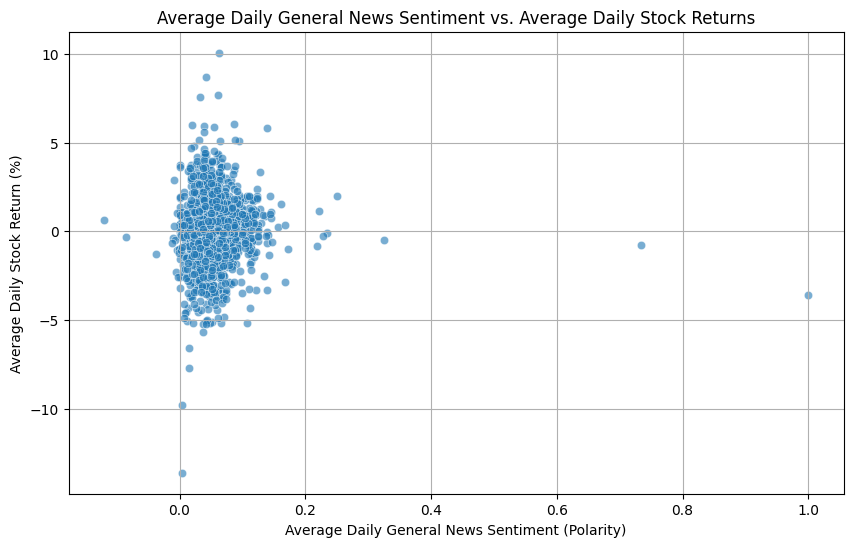

In [ ]:
if len(merged_correlation_df) > 1:
        #  Pearson correlation coefficient between average daily general news sentiment and average daily stock returns
        correlation = merged_correlation_df['average_daily_general_sentiment'].corr(merged_correlation_df['average_daily_return_percent'])

        print(f"\n--- KPI: Correlation Strength ---")
        print(f"Pearson Correlation between Average Daily General News Sentiment and Average Daily Stock Returns: {correlation:.4f}")

        # Interpret the strength and direction of the correlation
        if abs(correlation) >= 0.7: strength = "Very Strong"
        elif abs(correlation) >= 0.5: strength = "Strong"
        elif abs(correlation) >= 0.3: strength = "Moderate"
        elif abs(correlation) >= 0.1: strength = "Weak"
        else: strength = "Very Weak/No"

        direction = "positive" if correlation > 0 else "negative" if correlation < 0 else "no"
        print(f"Interpretation: There is a {strength} {direction} linear correlation.")

        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x='average_daily_general_sentiment',
            y='average_daily_return_percent',
            data=merged_correlation_df,
            alpha=0.6 
        )
        plt.title('Average Daily General News Sentiment vs. Average Daily Stock Returns')
        plt.xlabel('Average Daily General News Sentiment (Polarity)')
        plt.ylabel('Average Daily Stock Return (%)')
        plt.grid(True)
        plt.show()